# Actual TensorFlow Intro

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Data generation

In [8]:
observations = 1000

xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10,10,(observations,1))

generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1,1,(observations,1))

generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)
#Not necesary for the names to be inputs and targets, we can call it whatever

## Solving with TensorFlow

In [9]:
training_data = np.load('TF_intro.npz')

In [10]:
input_size = 2
output_size = 1

# model = tf.keras.Sequential([
#                             tf.keras.layers.Dense(output_size)
#                             ])

#We can add a weights initializer (kernel) and a bias initializer as well

model = tf.keras.Sequential([
                            tf.keras.layers.Dense(output_size,
                                                 kernel_initializer=tf.random_uniform_initializer(minval=-0.1,maxval=0.1),
                                                 bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)
                                                 )
                            ])

model.compile(optimizer='sgd',loss='mean_squared_error')

model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=1)

Epoch 1/100
32/32 [==============================] - 0s 643us/step - loss: 30.0300
Epoch 2/100
32/32 [==============================] - 0s 611us/step - loss: 4.4941
Epoch 3/100
32/32 [==============================] - 0s 611us/step - loss: 1.4679
Epoch 4/100
32/32 [==============================] - 0s 611us/step - loss: 0.6408
Epoch 5/100
32/32 [==============================] - 0s 579us/step - loss: 0.4263
Epoch 6/100
32/32 [==============================] - 0s 579us/step - loss: 0.3652
Epoch 7/100
32/32 [==============================] - 0s 515us/step - loss: 0.3470
Epoch 8/100
32/32 [==============================] - 0s 547us/step - loss: 0.3471
Epoch 9/100
32/32 [==============================] - 0s 515us/step - loss: 0.3399
Epoch 10/100
32/32 [==============================] - 0s 579us/step - loss: 0.3423
Epoch 11/100
32/32 [==============================] - 0s 515us/step - loss: 0.3443
Epoch 12/100
32/32 [==============================] - 0s 515us/step - loss: 0.3392
Epoch 13/100

32/32 [==============================] - 0s 515us/step - loss: 0.3500
Epoch 100/100
32/32 [==============================] - 0s 515us/step - loss: 0.3480


## Extract the weigths and bias

In [11]:
model.layers[0].get_weights()

[array([[ 1.988104 ],
        [-3.0301795]], dtype=float32),
 array([5.0013847], dtype=float32)]

In [12]:
weights = model.layers[0].get_weights()[0]
weights

array([[ 1.988104 ],
       [-3.0301795]], dtype=float32)

In [13]:
bias = model.layers[0].get_weights()[1]
bias

array([5.0013847], dtype=float32)

## Extract the outputs (make predictions)

In [14]:
model.predict_on_batch(training_data['inputs'])

array([[-10.256969  ],
       [ 17.61127   ],
       [ 15.188787  ],
       [ 30.524967  ],
       [ 25.194115  ],
       [  6.9941874 ],
       [  7.1998405 ],
       [ 14.267846  ],
       [ 23.897884  ],
       [ -5.5772552 ],
       [ 33.843056  ],
       [-16.933136  ],
       [ -7.1633196 ],
       [ -6.8932304 ],
       [-13.702141  ],
       [ 22.305752  ],
       [-24.509132  ],
       [ 31.208677  ],
       [ -5.312151  ],
       [ 21.943829  ],
       [ 36.85742   ],
       [  3.5703862 ],
       [-30.80481   ],
       [ -7.3532352 ],
       [ 19.723244  ],
       [ 18.384058  ],
       [  2.2579203 ],
       [ 22.489086  ],
       [ -1.938755  ],
       [  4.2813644 ],
       [-13.386381  ],
       [-16.730415  ],
       [ 33.981285  ],
       [ -3.1943703 ],
       [-25.769457  ],
       [ 18.485394  ],
       [ 44.653484  ],
       [ 12.187538  ],
       [  4.052706  ],
       [-11.333532  ],
       [ -5.5478964 ],
       [-19.435442  ],
       [ 28.177082  ],
       [ 20

In [15]:
model.predict_on_batch(training_data['inputs']).round(1)

array([[-10.3],
       [ 17.6],
       [ 15.2],
       [ 30.5],
       [ 25.2],
       [  7. ],
       [  7.2],
       [ 14.3],
       [ 23.9],
       [ -5.6],
       [ 33.8],
       [-16.9],
       [ -7.2],
       [ -6.9],
       [-13.7],
       [ 22.3],
       [-24.5],
       [ 31.2],
       [ -5.3],
       [ 21.9],
       [ 36.9],
       [  3.6],
       [-30.8],
       [ -7.4],
       [ 19.7],
       [ 18.4],
       [  2.3],
       [ 22.5],
       [ -1.9],
       [  4.3],
       [-13.4],
       [-16.7],
       [ 34. ],
       [ -3.2],
       [-25.8],
       [ 18.5],
       [ 44.7],
       [ 12.2],
       [  4.1],
       [-11.3],
       [ -5.5],
       [-19.4],
       [ 28.2],
       [ 20.6],
       [-34.8],
       [ 10.8],
       [-37.7],
       [ -3.9],
       [ 41.8],
       [-29.1],
       [ -1.1],
       [ -2.1],
       [ 18.2],
       [ 34.5],
       [-17.2],
       [-16.4],
       [  3. ],
       [  8.3],
       [-20.8],
       [ 30.1],
       [-33.4],
       [-35.7],
       [

In [16]:
training_data['targets'].round(1)

array([[-10.8],
       [ 17.8],
       [ 15.2],
       [ 30.1],
       [ 25. ],
       [  7.1],
       [  8.1],
       [ 14.4],
       [ 23.4],
       [ -6.3],
       [ 34.4],
       [-16.9],
       [ -7.2],
       [ -7.4],
       [-13.8],
       [ 23.1],
       [-23.5],
       [ 30.9],
       [ -5.2],
       [ 21.6],
       [ 35.9],
       [  3.1],
       [-30. ],
       [ -6.9],
       [ 20.3],
       [ 18.6],
       [  1.7],
       [ 22.2],
       [ -2.2],
       [  3.7],
       [-14. ],
       [-15.7],
       [ 32.8],
       [ -4. ],
       [-25.2],
       [ 18.2],
       [ 44.9],
       [ 12.1],
       [  4.3],
       [-11.3],
       [ -6.1],
       [-19.2],
       [ 27.2],
       [ 20. ],
       [-34.2],
       [ 11.4],
       [-36.5],
       [ -3.1],
       [ 40.7],
       [-29.4],
       [ -2. ],
       [ -2.4],
       [ 17.6],
       [ 34.1],
       [-17.4],
       [-16.9],
       [  2.5],
       [  7.4],
       [-21. ],
       [ 30. ],
       [-32.2],
       [-35.4],
       [

## Plotting the data

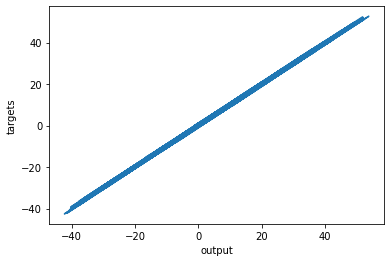

In [17]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('output')
plt.ylabel('targets')
plt.show()